In [0]:
import seaborn
import numpy as np
from scipy.sparse import csr_matrix, lil_matrix

In [0]:
boxes = [(69, 111), (69, 264),
         (138, 12), (138, 165),
         (192, 111), (192, 264),
         (261, 12), (261, 165)]
L_houses = [(69, 12), (69, 165),
            (192, 12), (192, 165)]

l_houses = [(138, 51), (138, 204),
            (261, 51), (261, 204)]


def L_house(posx, posy, x, y):
    if posx < x and x < posx + 18 and posy < y and y < posy + 78:
        return True

    posx = posx + 12

    return (posx < x and x < posx + 12 and posy < y and y < posy + 18)

def l_house(posx, posy, x, y):
    if posx < x and x < posx + 18 and posy < y and y < posy + 78:
        return True

    posx = posx - 12
    posy = posy + 60

    return (posx < x and x < posx + 13 and posy < y and y < posy + 18)


def box_house(posx, posy, x, y):
    return (posx < x and x < posx + 18 and posy < y and y < posy + 18)


def houses_check(x, y):
    for box in boxes:
        if box_house(box[0], box[1], x, y):
            return True

    for house in L_houses:
        if L_house(house[0], house[1], x, y):
            return True

    for house in l_houses:
        if l_house(house[0], house[1], x, y):
            return True
    return False


def edge_cond_check(x, y, n):
    if houses_check(x, y):
        return True
    if x >= n or y >= n or y == 0:
        return True
    return False


In [0]:
def solve(max_steps=1000000, eps=1e-5, n=300):
    lambda1 = 1.0
    lambda2 = 0

    k = 0.5
    h = 1 / n
    tau = h * h / (4 * k)

    N = n * n

    x = np.zeros(N)
    for i in range(n):
        x[i] = 1

    A = lil_matrix((N, N))

    f = np.zeros(N)

    dcol = [1, -1, 0, 0]
    drow = [0, 0, 1, -1]
    u0coeff = 1 - 4 * (tau * k) / (h ** 2)
    coeffs = [tau * (k / (h * h) - lambda1 / (2 * h)),
              tau * (k / (h * h) + lambda1 / (2 * h)),
              tau * (k / (h * h) - lambda2 / (2 * h)),
              tau * (k / (h * h) + lambda2 / (2 * h))]

    for col in range(n):
        for row in range(n):
            ind = col * n + row

            if col == 0:
                A[ind, ind] = 1
                continue

            A[ind, ind] = u0coeff
            for i in range(4):
                ncol = col + dcol[i]
                nrow = row + drow[i]
                coeff = coeffs[i]

                if ncol <= 0:
                    f[ind] += coeff
                elif edge_cond_check(ncol, nrow, n):
                    A[ind, ind] += coeff
                else:
                    A[ind, ncol * n + nrow] = coeff

    A = csr_matrix(A)

    start = time.time()

    for i in range(max_steps):
        xs_new = A @ x + f
        error = np.max(np.abs(xs_new - x))
        if error < eps:
            print('time: {} sec'.format(round(time.time() - start), 4))
            print('steps taken: {}'.format(i))
            break
        x = xs_new
    return x.reshape((n, n)).T[::-1]

time: 34 sec
steps taken: 36035


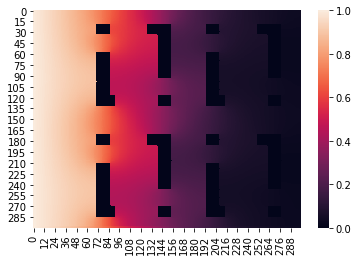

In [27]:
u = solve(eps=10e-6)
seaborn.heatmap(u)

time: 281 sec
steps taken: 301938


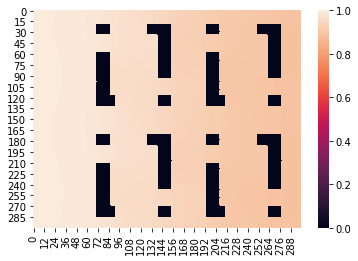

In [28]:
u = solve(eps=10e-7)
seaborn.heatmap(u)